# 1.4.10 Histograms in OpenCV

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
img = cv2.imread('./img/histogram_data_img.jpg',0)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [6]:
hist

array([[5.3000e+01],
       [1.8800e+02],
       [8.1300e+02],
       [1.8680e+03],
       [2.8060e+03],
       [3.4440e+03],
       [4.1750e+03],
       [5.4100e+03],
       [6.1290e+03],
       [6.3040e+03],
       [6.1490e+03],
       [6.5160e+03],
       [6.8890e+03],
       [7.7000e+03],
       [7.0450e+03],
       [7.0530e+03],
       [7.5560e+03],
       [9.8380e+03],
       [1.1473e+04],
       [1.2341e+04],
       [1.4290e+04],
       [1.6874e+04],
       [1.8385e+04],
       [1.8816e+04],
       [1.8553e+04],
       [1.9003e+04],
       [1.9074e+04],
       [1.7820e+04],
       [1.7108e+04],
       [1.6458e+04],
       [1.6212e+04],
       [1.6937e+04],
       [1.6482e+04],
       [1.6738e+04],
       [1.6788e+04],
       [1.6929e+04],
       [1.6795e+04],
       [1.6926e+04],
       [1.7075e+04],
       [1.7059e+04],
       [1.7031e+04],
       [1.6589e+04],
       [1.6129e+04],
       [1.6084e+04],
       [1.6177e+04],
       [1.5939e+04],
       [1.6090e+04],
       [1.645

In [7]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

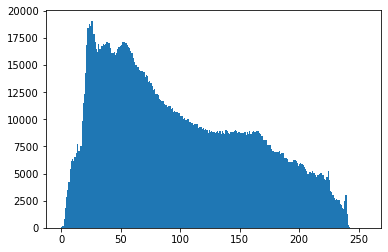

In [8]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

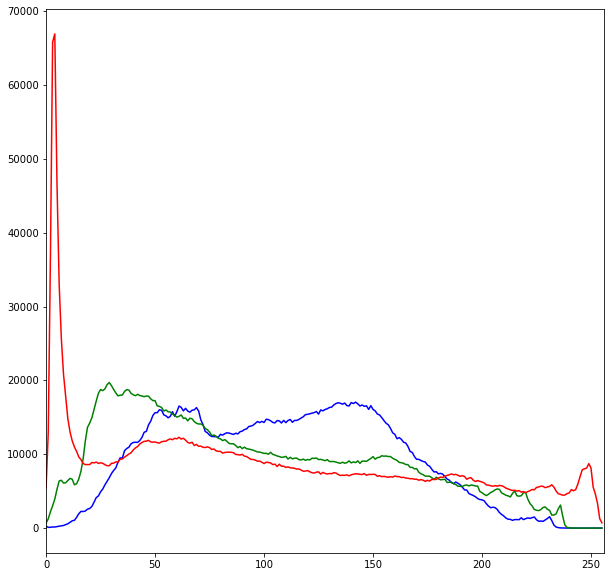

In [10]:
img = cv2.imread('./img/histogram_data_img.jpg')
color = ('b','g','r')
plt.figure(figsize=(10,10))
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [12]:
img.shape

(1200, 1920, 3)

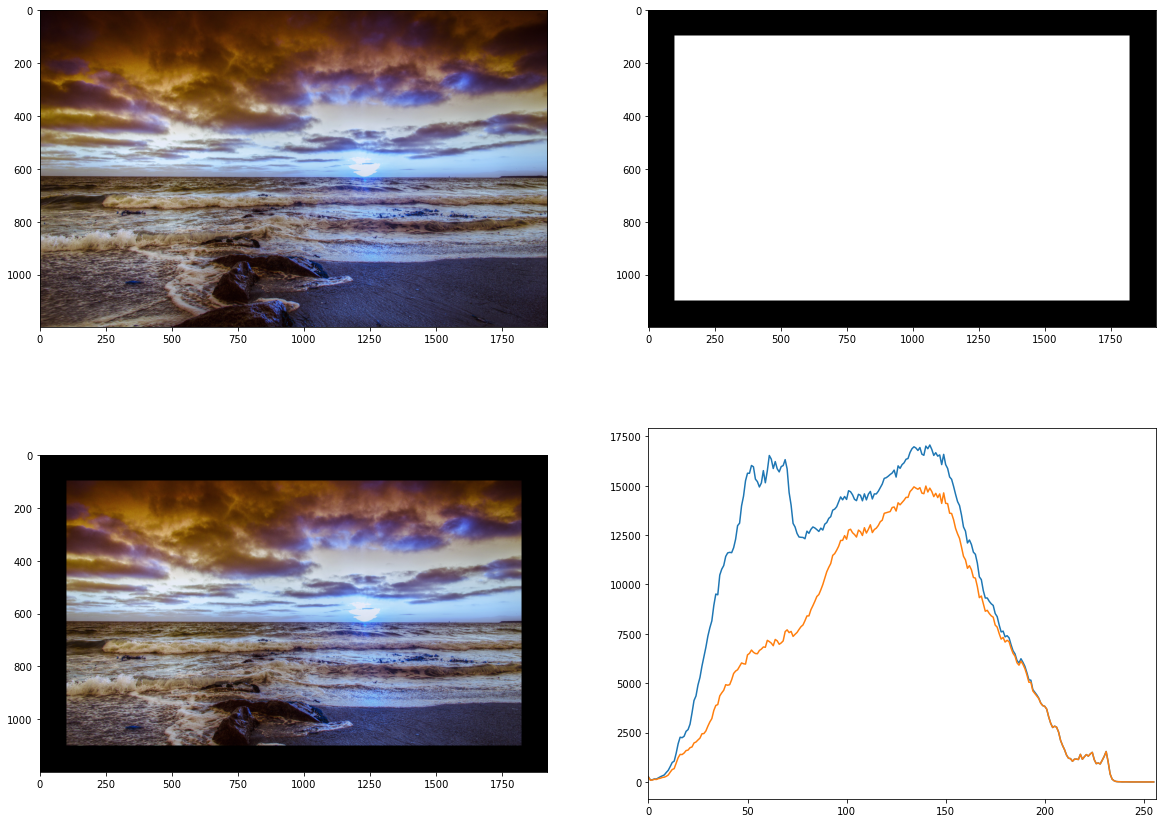

In [20]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:1100, 100:1820] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.figure(figsize=(20,15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

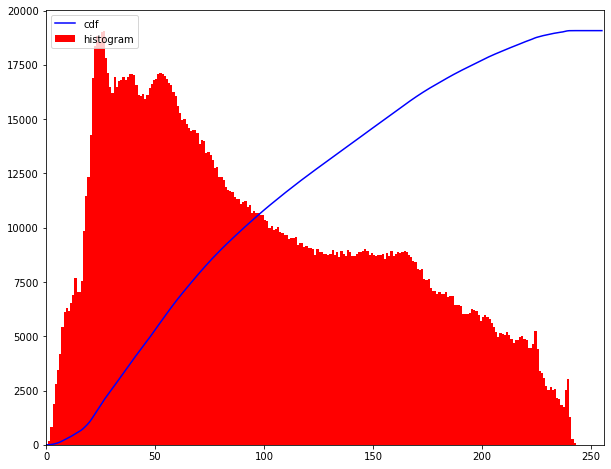

In [41]:
img = cv2.imread('./img/histogram_data_img.jpg',0)
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.figure(figsize=(10,8))
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [42]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [43]:
img2 = cdf[img]

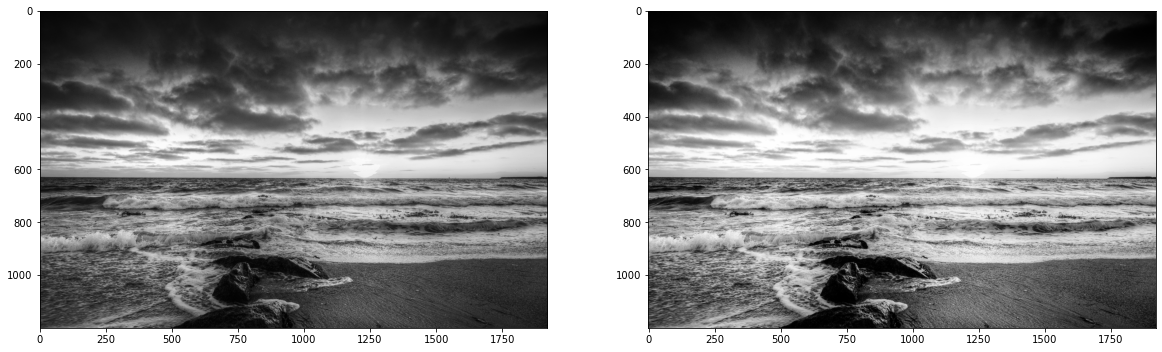

In [44]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2, 'gray')
plt.show()

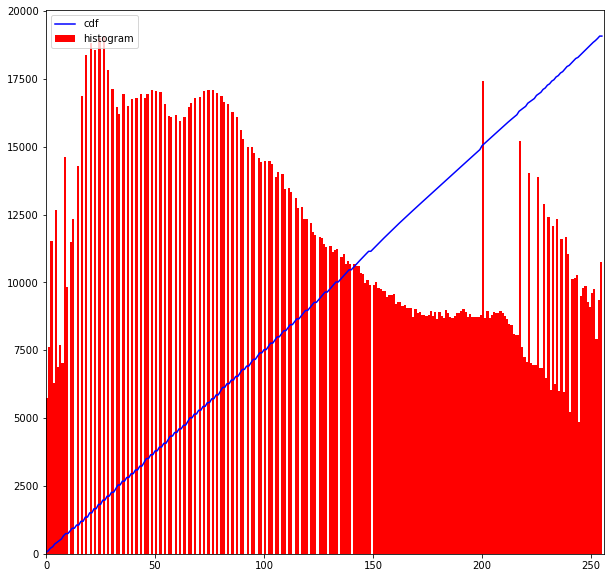

In [47]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.figure(figsize=(10,10))
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

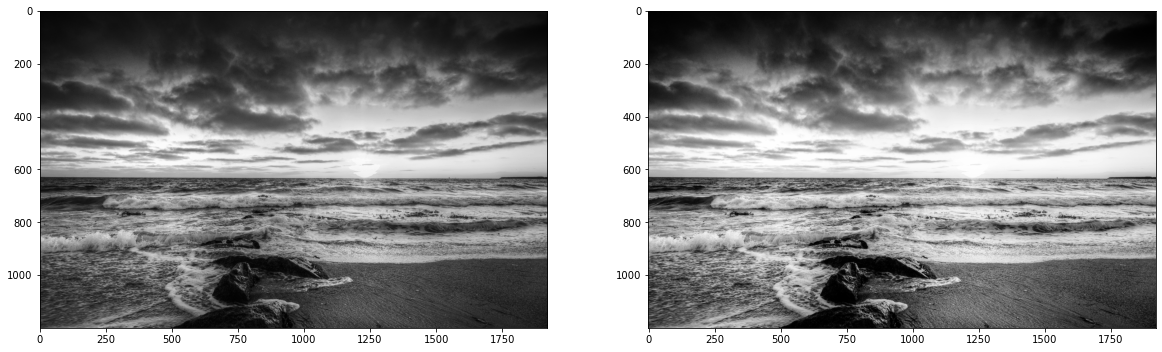

In [52]:
img = cv2.imread('./img/histogram_data_img.jpg',0)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2, 'gray')
plt.show()

In [49]:
img = cv2.imread('./img/histogram_data_img.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()